In [1]:
import rasterio
import matplotlib.pyplot as plt

In [2]:
# File path
file_path = r'D:\Jintu\Jintu_GEDI\AGBD\Study Area\GEDI04_B_MW019MW138_02_002_021.tif'

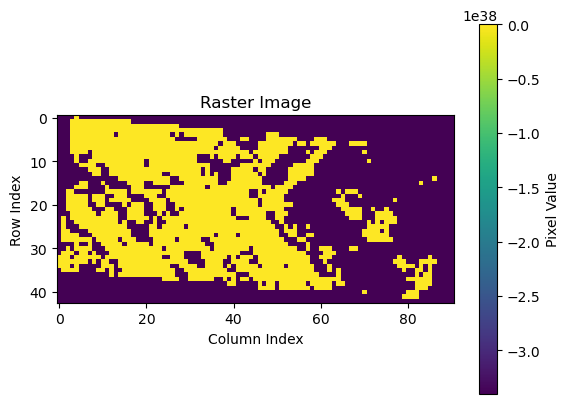

In [3]:
# Open the GeoTIFF file
with rasterio.open(file_path) as src:
    # Read the raster data as a NumPy array
    raster_array = src.read(1)  # Change the band index if necessary

    # Plot the raster array
    plt.imshow(raster_array, cmap='viridis')
    plt.colorbar(label='Pixel Value')
    plt.title('Raster Image')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()

In [8]:
import csv
import numpy as np

In [5]:
# File paths
file_path = r'D:\Jintu\Jintu_GEDI\AGBD\Study Area\GEDI04_B_MW019MW138_02_002_021.tif'
csv_output_path = r'D:\Jintu\Jintu_GEDI\AGBD\Study Area\raster_data.csv'

In [6]:
# Open the GeoTIFF file
with rasterio.open(file_path) as src:
    # Read the raster data as a NumPy array
    raster_array = src.read(1)  # Change the band index if necessary
    transform = src.transform

In [16]:
# Get the coordinates (longitude, latitude) for each pixel
rows, cols = np.indices(raster_array.shape)
lon, lat = rasterio.transform.xy(transform, rows.flatten(), cols.flatten())

In [25]:
print(lon)

[92.01721666341348, 92.0267537246185, 92.03629078582352, 92.04582784702855, 92.05536490823357, 92.0649019694386, 92.07443903064362, 92.08397609184864, 92.09351315305366, 92.10305021425869, 92.11258727546371, 92.12212433666873, 92.13166139787376, 92.14119845907878, 92.1507355202838, 92.16027258148883, 92.16980964269385, 92.17934670389887, 92.1888837651039, 92.19842082630892, 92.20795788751394, 92.21749494871897, 92.22703200992399, 92.23656907112901, 92.24610613233403, 92.25564319353906, 92.26518025474408, 92.2747173159491, 92.28425437715413, 92.29379143835915, 92.30332849956417, 92.3128655607692, 92.32240262197422, 92.33193968317924, 92.34147674438427, 92.35101380558929, 92.36055086679431, 92.37008792799934, 92.37962498920436, 92.38916205040938, 92.3986991116144, 92.40823617281943, 92.41777323402445, 92.42731029522947, 92.4368473564345, 92.4463844176395, 92.45592147884453, 92.46545854004955, 92.47499560125458, 92.4845326624596, 92.49406972366462, 92.50360678486965, 92.51314384607467, 92

In [43]:
values = raster_array.flatten()

In [49]:
import pandas as pd

In [44]:
# Combine the coordinates and values into a list of tuples
data = list(zip(lon, lat, values))

In [45]:
# Write the data to a CSV file
with open(csv_output_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Longitude', 'Latitude', 'Pixel Value'])
    csv_writer.writerows(data)

In [46]:
print(f'CSV file saved to: {csv_output_path}')

CSV file saved to: D:\Jintu\Jintu_GEDI\AGBD\Study Area\raster_data.csv


In [51]:
# File paths
csv_input_path = r'D:\Jintu\Jintu_GEDI\AGBD\Study Area\raster_data.csv'
csv_output_path_final = r'D:\Jintu\Jintu_GEDI\AGBD\Study Area\raster_data_final.csv'

In [64]:
# Load the CSV file into a DataFrame
df = pd.read_csv(csv_input_path)

# Filter out rows with specific values
df_filtered = df[df['Pixel Value'] != -3.402823e+38]

print(df_filtered)

      Longitude   Latitude   Pixel Value
0     92.017217  27.026064 -3.402823e+38
1     92.026754  27.026064 -3.402823e+38
2     92.036291  27.026064 -3.402823e+38
3     92.045828  27.026064 -3.402823e+38
4     92.055365  27.026064  2.934220e+02
...         ...        ...           ...
3908  92.837404  26.625507 -3.402823e+38
3909  92.846941  26.625507 -3.402823e+38
3910  92.856478  26.625507 -3.402823e+38
3911  92.866015  26.625507 -3.402823e+38
3912  92.875552  26.625507 -3.402823e+38

[3913 rows x 3 columns]


In [60]:
print(df[df['Pixel Value'] != -3.402823E+38])

      Longitude   Latitude   Pixel Value
0     92.017217  27.026064 -3.402823e+38
1     92.026754  27.026064 -3.402823e+38
2     92.036291  27.026064 -3.402823e+38
3     92.045828  27.026064 -3.402823e+38
4     92.055365  27.026064  2.934220e+02
...         ...        ...           ...
3908  92.837404  26.625507 -3.402823e+38
3909  92.846941  26.625507 -3.402823e+38
3910  92.856478  26.625507 -3.402823e+38
3911  92.866015  26.625507 -3.402823e+38
3912  92.875552  26.625507 -3.402823e+38

[3913 rows x 3 columns]


In [ ]:
# Save the filtered data to a new CSV file
df_filtered.to_csv(csv_output_path_final, index=False)

print(f'Final CSV file saved to: {csv_output_path_final}')